In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))
plt.rcParams['figure.dpi'] = 300

default_size = 18
plt.rc('font', size=default_size)
plt.rc('axes', titlesize=default_size)     # fontsize of the axes title
plt.rc('axes', labelsize=default_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=default_size)    # legend fontsize
plt.rc('figure', titlesize=default_size)

color_h2 = 'lightblue'

color_life = 'blue'
color_atm_life ='dodgerblue'

color_atm_prod = 'teal'
color_atm_loss = 'goldenrod'
color_drydep = 'brown'
color_emis = 'orangered'


#model_dict = { 'OSLOCTM3':'OsloCTM',
#               'WACCM6-2deg':'WACCM',
#               'INCA':'INCA',
#               'GFDL-emi':'GFDL-emi',
#               'GFDL_nudge':'GFDL',
#               'UKCA':'UKCA',
#               'OSLOCTM3-emi':'OsloCTM-emi'}

#sorted_array = ['GFDL','INCA','OsloCTM','UKCA','WACCM','GFDL-emi','OsloCTM-emi','Model mean']
#sorted_array_w_uci = ['GFDL','INCA','OsloCTM','UCI','UKCA','WACCM','GFDL-emi','OsloCTM-emi','Model mean']
#starplot = False

In [2]:
filepath= r"./output/"
df_budget = pd.read_csv(filepath+'table_budget_h2.csv',index_col=0)
df_budget

,H2 burden [Tg],H2 surf. conc [ppbv],H2 atm loss [Tg/yr],H2 atm prod [Tg/yr],H2 soil sink [Tg/yr],H2 estimated emissions [Tg/yr],H2 atm lifetime [yrs],H2 soil sink lifetime [yrs],H2 total lifetime [yrs]
CNTR,205,559,29.2,55.8,58.0,31.4,7.02,3.53,2.35
H2_avi,206,564,29.4,55.6,58.5,32.3,7.02,3.52,2.35
antro1,207,565,29.4,55.8,58.7,32.3,7.02,3.52,2.34
10CH4_SSP119,188,514,25.2,47.2,53.4,31.4,7.48,3.52,2.39
10CH4_SSP434,235,640,28.6,63.4,66.1,31.3,8.21,3.55,2.48
10CH4_SSP585,245,668,31.4,69.0,68.9,31.3,7.81,3.56,2.44
CNTR_SSP119,181,495,24.9,45.0,51.5,31.4,7.26,3.51,2.37
CNTR_SSP434,225,613,28.3,60.4,63.5,31.3,7.95,3.54,2.45
CNTR_SSP585,234,638,31.0,65.6,66.0,31.3,7.55,3.55,2.41
antro10_SSP119,203,558,27.8,44.9,58.5,41.4,7.29,3.46,2.35


In [3]:
df_feedback = pd.read_csv(filepath+'feedback_factor_h2.csv',index_col=0,header=0)
df_feedback.index = ['Feedback factor']
df_feedback.T

,Feedback factor
antro1,0.91
H2_avi,0.96
SSP119,0.94
SSP434,0.93
SSP585,0.93


In [4]:
df_feedback_lifetime = df_feedback.T
df_feedback_lifetime['H2 total lifetime [yrs]'] = df_budget['H2 total lifetime [yrs]'].loc['CNTR']

df_feedback_lifetime.loc['SSP119']['H2 total lifetime [yrs]'] = df_budget['H2 total lifetime [yrs]'].loc['CNTR_SSP119']
df_feedback_lifetime.loc['SSP434']['H2 total lifetime [yrs]'] = df_budget['H2 total lifetime [yrs]'].loc['CNTR_SSP434']
df_feedback_lifetime.loc['SSP585']['H2 total lifetime [yrs]'] = df_budget['H2 total lifetime [yrs]'].loc['CNTR_SSP585']



df_feedback_lifetime['H2 perturbation lifetime [yrs]'] =df_feedback_lifetime['H2 total lifetime [yrs]']*df_feedback_lifetime['Feedback factor']
df_feedback_lifetime.to_csv('output/feedback_lifetime.csv')
df_feedback_lifetime

/tmp/ipykernel_2286/4167109125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feedback_lifetime.loc['SSP119']['H2 total lifetime [yrs]'] = df_budget['H2 total lifetime [yrs]'].loc['CNTR_SSP119']
/tmp/ipykernel_2286/4167109125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feedback_lifetime.loc['SSP434']['H2 total lifetime [yrs]'] = df_budget['H2 total lifetime [yrs]'].loc['CNTR_SSP434']
/tmp/ipykernel_2286/4167109125.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,Feedback factor,H2 total lifetime [yrs],H2 perturbation lifetime [yrs]
antro1,0.91,2.35,2.14
H2_avi,0.96,2.35,2.25
SSP119,0.94,2.35,2.20
SSP434,0.93,2.35,2.18
SSP585,0.93,2.35,2.18


In [6]:
#For EGU:
#df_feedback_lifetime.loc[['antro1','nemo','epia','munich','usdrydep','maxdep','maud','zep']]

In [7]:
df_budget = pd.concat([df_budget,df_feedback.T],sort=False,axis=1)
df_budget


,H2 burden [Tg],H2 surf. conc [ppbv],H2 atm loss [Tg/yr],H2 atm prod [Tg/yr],H2 soil sink [Tg/yr],H2 estimated emissions [Tg/yr],H2 atm lifetime [yrs],H2 soil sink lifetime [yrs],H2 total lifetime [yrs],Feedback factor
CNTR,205,559,29.2,55.8,58.0,31.4,7.02,3.53,2.35,NaN
H2_avi,206,564,29.4,55.6,58.5,32.3,7.02,3.52,2.35,0.96
antro1,207,565,29.4,55.8,58.7,32.3,7.02,3.52,2.34,0.91
10CH4_SSP119,188,514,25.2,47.2,53.4,31.4,7.48,3.52,2.39,NaN
10CH4_SSP434,235,640,28.6,63.4,66.1,31.3,8.21,3.55,2.48,NaN
10CH4_SSP585,245,668,31.4,69.0,68.9,31.3,7.81,3.56,2.44,NaN
CNTR_SSP119,181,495,24.9,45.0,51.5,31.4,7.26,3.51,2.37,NaN
CNTR_SSP434,225,613,28.3,60.4,63.5,31.3,7.95,3.54,2.45,NaN
CNTR_SSP585,234,638,31.0,65.6,66.0,31.3,7.55,3.55,2.41,NaN
antro10_SSP119,203,558,27.8,44.9,58.5,41.4,7.29,3.46,2.35,NaN


In [8]:
df_budget = df_budget.loc[['CNTR','CNTR_SSP119','CNTR_SSP434','CNTR_SSP585']]

In [9]:
df_budget[['H2 burden [Tg]','H2 surf. conc [ppbv]','H2 atm prod [Tg/yr]','H2 atm lifetime [yrs]','H2 soil sink lifetime [yrs]','H2 total lifetime [yrs]']]

,H2 burden [Tg],H2 surf. conc [ppbv],H2 atm prod [Tg/yr],H2 atm lifetime [yrs],H2 soil sink lifetime [yrs],H2 total lifetime [yrs]
CNTR,205,559,55.8,7.02,3.53,2.35
CNTR_SSP119,181,495,45.0,7.26,3.51,2.37
CNTR_SSP434,225,613,60.4,7.95,3.54,2.45
CNTR_SSP585,234,638,65.6,7.55,3.55,2.41


In [10]:
df_budget_diff = df_budget[['H2 burden [Tg]','H2 surf. conc [ppbv]','H2 atm prod [Tg/yr]','H2 atm lifetime [yrs]','H2 soil sink lifetime [yrs]','H2 total lifetime [yrs]']]
df_budget_diff = df_budget_diff - df_budget_diff.loc['CNTR']
df_budget_diff.loc['CNTR'] = df_budget.loc['CNTR'][['H2 burden [Tg]','H2 surf. conc [ppbv]','H2 atm prod [Tg/yr]','H2 atm lifetime [yrs]','H2 soil sink lifetime [yrs]','H2 total lifetime [yrs]']]
df_budget_diff

,H2 burden [Tg],H2 surf. conc [ppbv],H2 atm prod [Tg/yr],H2 atm lifetime [yrs],H2 soil sink lifetime [yrs],H2 total lifetime [yrs]
CNTR,205,559,55.8,7.02,3.53,2.35
CNTR_SSP119,-23.6,-63.8,-10.8,0.24,-0.01,0.02
CNTR_SSP434,20.4,54.3,4.62,0.93,0.02,0.10
CNTR_SSP585,29.6,79.0,9.85,0.53,0.02,0.07


In [11]:
re_index = {'CNTR_SSP119': 'diff. SSP119',
            'CNTR_SSP434': 'diff. SSP434',
            'CNTR_SSP585': 'diff. SSP585'}

df_budget_diff_toegu = df_budget_diff.drop('H2 surf. conc [ppbv]',axis=1)
df_budget_diff_toegu = df_budget_diff_toegu.rename(re_index)
df_budget_diff_toegu

,H2 burden [Tg],H2 atm prod [Tg/yr],H2 atm lifetime [yrs],H2 soil sink lifetime [yrs],H2 total lifetime [yrs]
CNTR,205,55.8,7.02,3.53,2.35
diff. SSP119,-23.6,-10.8,0.24,-0.01,0.02
diff. SSP434,20.4,4.62,0.93,0.02,0.10
diff. SSP585,29.6,9.85,0.53,0.02,0.07


In [12]:
df_budget_diff_to_manuscript = df_budget_diff
df_budget_diff_to_manuscript = df_budget_diff_to_manuscript.rename(re_index)
df_budget_diff_to_manuscript.to_csv('output/budget_diff_to_manuscript.csv')

In [13]:
xlabels = df_budget.index

df_budget.loc['Emission driven:'] = np.empty(9)*np.nan
df_budget.loc[''] = np.empty(9)*np.nan
df_budget=df_budget.reindex(['GFDL','INCA','OsloCTM','UCI','UKCA','WACCM','','Model mean','Emission driven:','GFDL-emi','OsloCTM-emi'])
xlabels = ['GFDL','INCA','OsloCTM','UCI','UKCA','WACCM','','Model mean','','GFDL-emi','OsloCTM-emi']

Estimate drydeposition values based on best availible H2 emissions and the model mean og H2 atmospheric production and atmospheric loss.

val1 = 'H2 atm loss [Tg/yr]'
val2 = 'H2 soil sink [Tg/yr]'
val3 = 'H2 atm prod [Tg/yr]'
val4 = 'H2 estimated emissions [Tg/yr]'
    
atmloss = df_budget[val1].loc['Model mean']
atmprod = df_budget[val3].loc['Model mean']
#drydep = 65.0
#emis = drydep + atmloss - atmprod
emis = 38. #df_budget[val4].loc['GFDL-emi']
drydep = emis + atmprod - atmloss
drydep

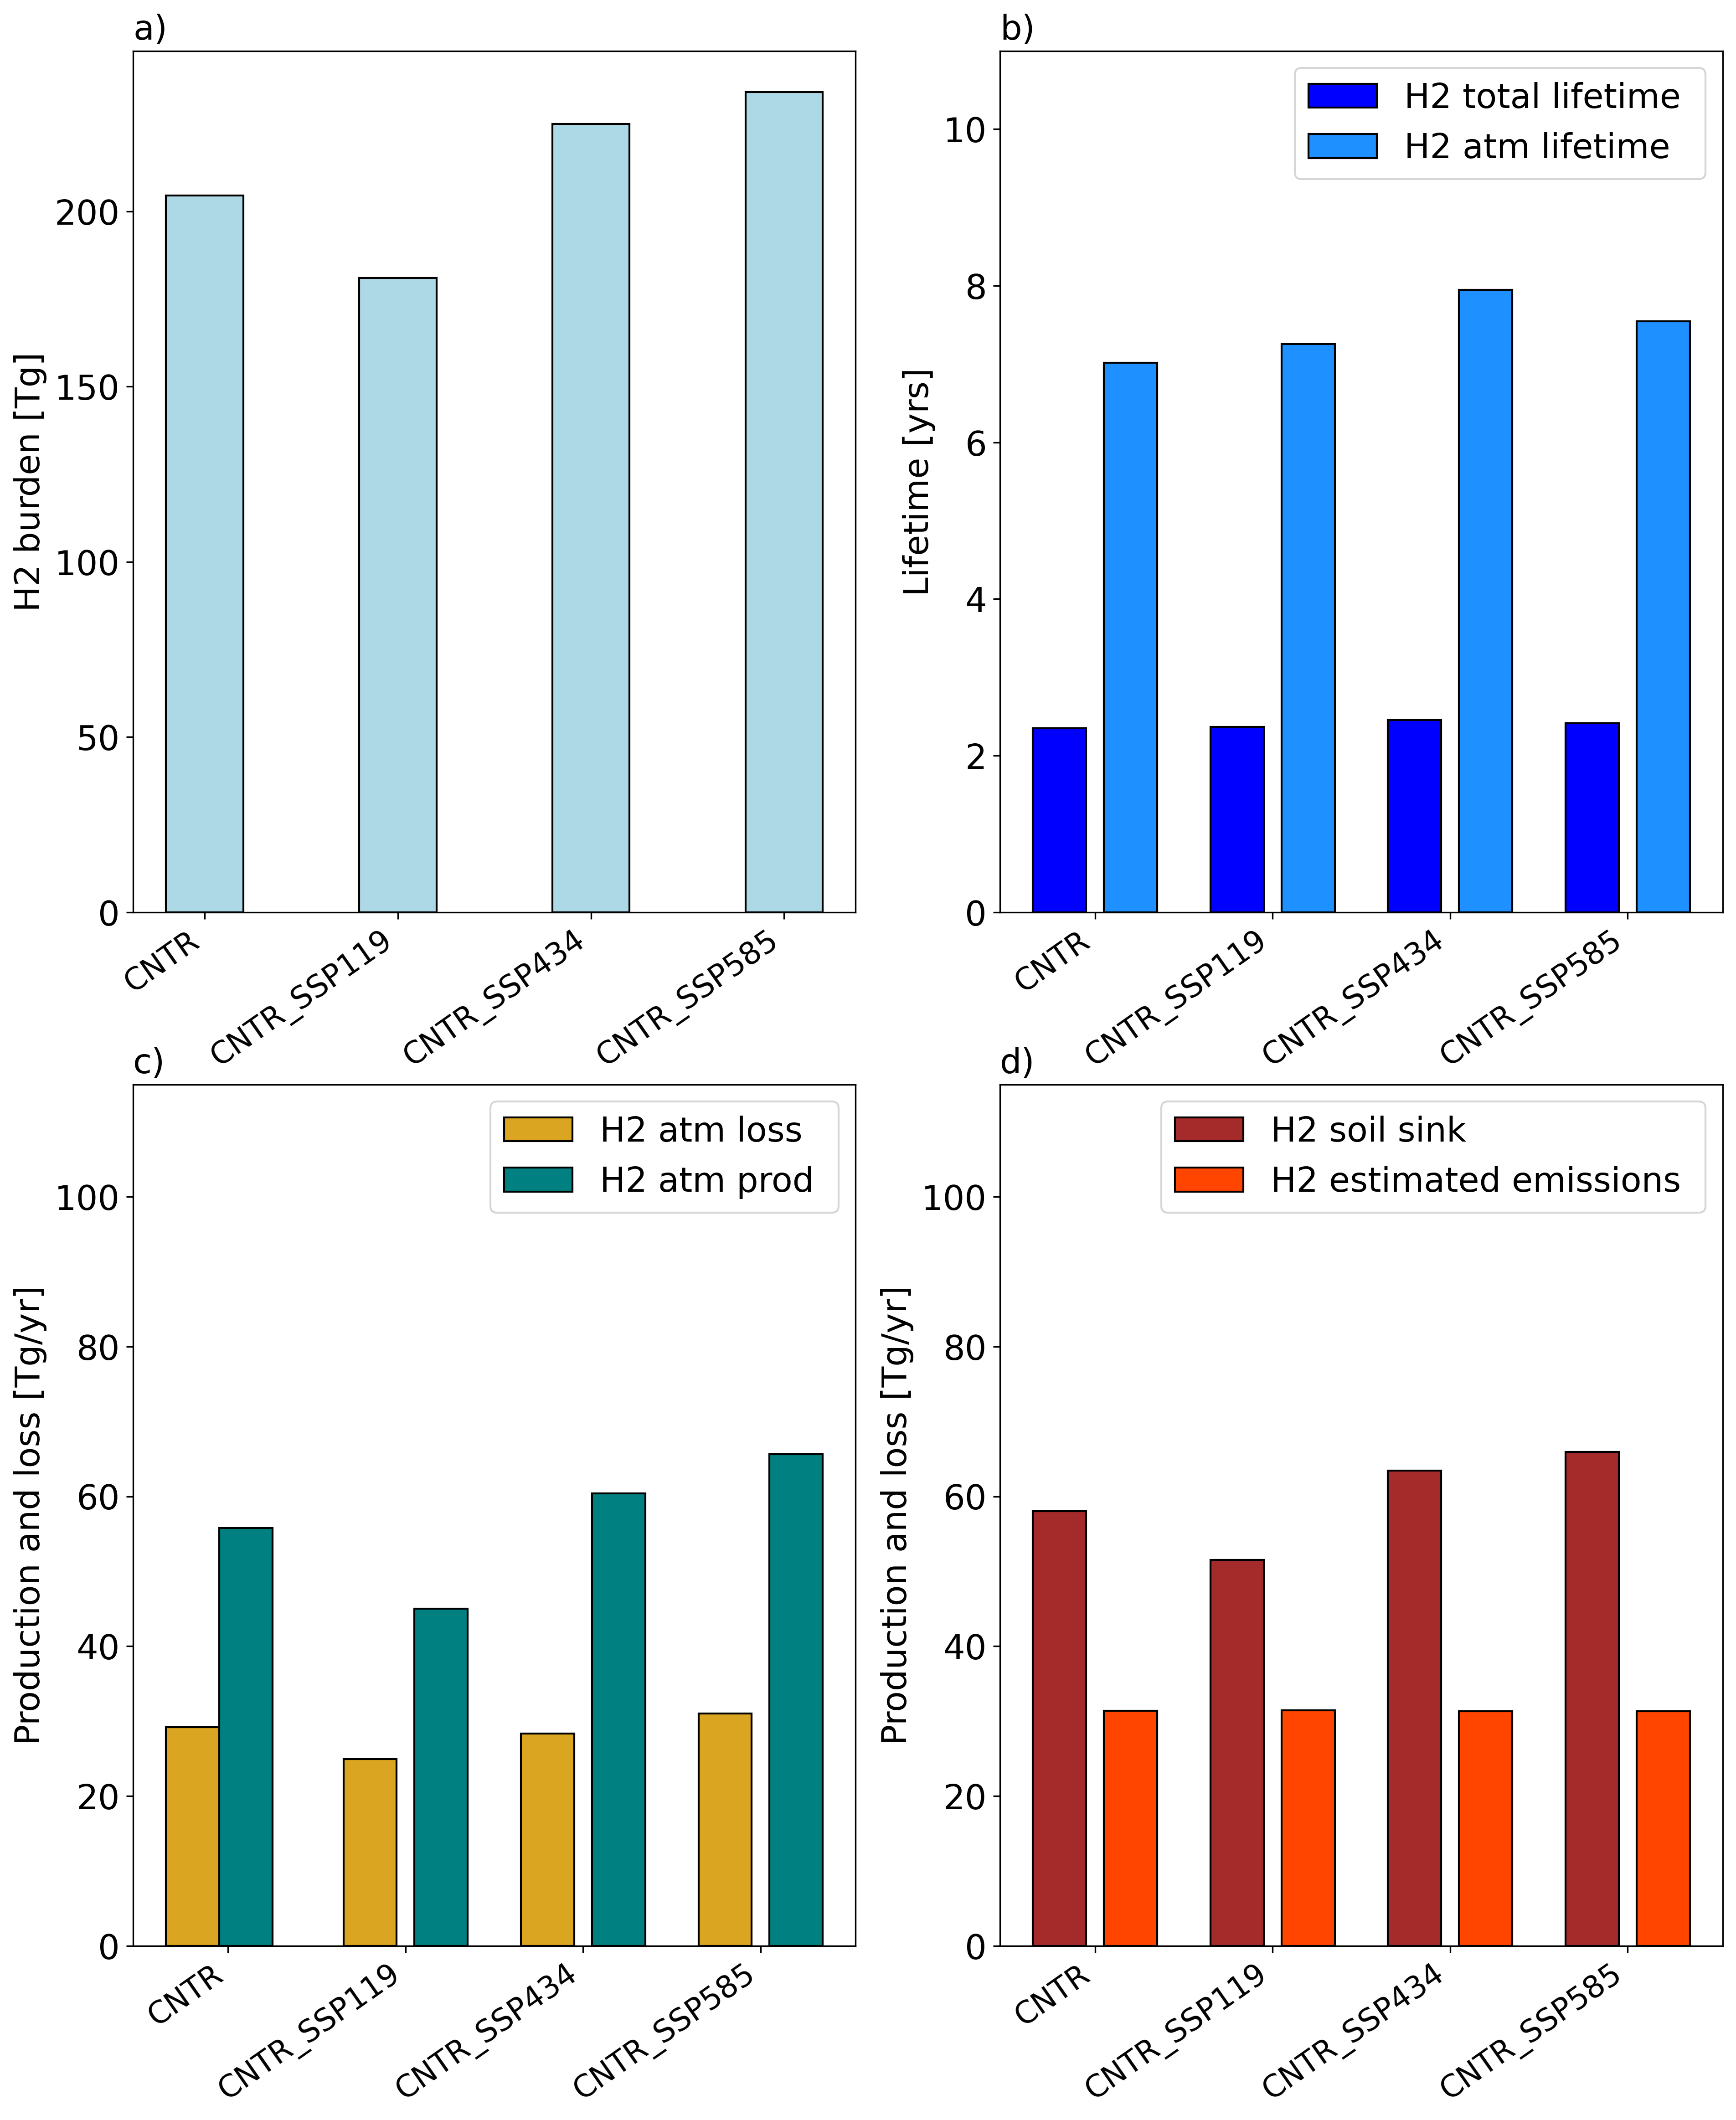

In [14]:
fig, axs = plt.subplots(nrows=2,ncols=2,squeeze=True,figsize=(15,18),sharey=False)
axs=axs.flatten()


#Burden:
plot_values = df_budget['H2 burden [Tg]']
for m,model in enumerate(df_budget.index):
   
    if model == 'Model mean':
        axs[0].bar(m,plot_values.loc[model],width=0.4,hatch='//',edgecolor='black',color=color_h2)
    else:
        axs[0].bar(m,plot_values.loc[model],width=0.4,edgecolor='black',color=color_h2)   

axs[0].set_xticks(np.arange(0,len(plot_values.index)))
axs[0].set_xticklabels(xlabels, rotation=35,horizontalalignment="right")



#Lifetime
for m,model in enumerate(df_budget.index):
    val1 = 'H2 total lifetime [yrs]'
    val2 = 'H2 atm lifetime [yrs]'
    if m == 0:
        axs[1].bar(m-0.2,df_budget[val1].loc[model],width=0.3,color=color_life,edgecolor='black',label=val1.split('[')[0])
        axs[1].bar(m+0.2,df_budget[val2].loc[model],width=0.3,color=color_atm_life,edgecolor='black',label=val2.split('[')[0])
   
    elif model == 'Model mean':
        axs[1].bar(m-0.2,df_budget[val1].loc[model],width=0.3,hatch='//',color=color_life,edgecolor='black')
        axs[1].bar(m+0.2,df_budget[val2].loc[model],width=0.3,hatch='//',color=color_atm_life,edgecolor='black')    
    else:
        axs[1].bar(m-0.2,df_budget[val1].loc[model],width=0.3,color=color_life,edgecolor='black')
        axs[1].bar(m+0.2,df_budget[val2].loc[model],width=0.3,color=color_atm_life,edgecolor='black')    

axs[1].set_xticks(np.arange(0,len(plot_values.index)))
axs[1].set_xticklabels(xlabels, rotation=35,horizontalalignment="right")
axs[1].legend()

#Prod and loss

for m,model in enumerate(df_budget.index):
    val1 = 'H2 atm loss [Tg/yr]'
    val2 = 'H2 soil sink [Tg/yr]'
    val3 = 'H2 atm prod [Tg/yr]'
    val4 = 'H2 estimated emissions [Tg/yr]'
    if m == 0:
        axs[2].bar(m-0.2,df_budget[val1].loc[model],width=0.3,color=color_atm_loss,edgecolor='black',label=val1.split('[')[0])
        axs[3].bar(m-0.2,df_budget[val2].loc[model],width=0.3,color=color_drydep,edgecolor='black',label=val2.split('[')[0])
        axs[2].bar(m+0.1,df_budget[val3].loc[model],width=0.3,color=color_atm_prod,edgecolor='black',label=val3.split('[')[0])
        axs[3].bar(m+0.2,df_budget[val4].loc[model],width=0.3,color=color_emis,edgecolor='black',label=val4.split('[')[0]) 
    elif model == 'Model mean':
        axs[2].bar(m-0.2,df_budget[val1].loc[model],width=0.3,hatch='//',color=color_atm_loss,edgecolor='black')
        axs[3].bar(m-0.2,df_budget[val2].loc[model],width=0.3,hatch='//',color=color_drydep,edgecolor='black')
        axs[2].bar(m+0.2,df_budget[val3].loc[model],width=0.3,hatch='//',color=color_atm_prod,edgecolor='black')
        axs[3].bar(m+0.2,df_budget[val4].loc[model],width=0.3,hatch='//',color=color_emis,edgecolor='black')  
        add_one = 1
    else:
        axs[2].bar(m-0.2,df_budget[val1].loc[model],width=0.3,color=color_atm_loss,edgecolor='black')
        axs[3].bar(m-0.2,df_budget[val2].loc[model],width=0.3,color=color_drydep,edgecolor='black')
        axs[2].bar(m+0.2,df_budget[val3].loc[model],width=0.3,color=color_atm_prod,edgecolor='black')
        axs[3].bar(m+0.2,df_budget[val4].loc[model],width=0.3,color=color_emis,edgecolor='black')  
                   
            
axs[2].set_xticks(np.arange(0,len(plot_values.index)))
axs[2].set_xticklabels(xlabels, rotation=35,horizontalalignment="right")

axs[3].set_xticks(np.arange(0,len(plot_values.index)))
axs[3].set_xticklabels(xlabels, rotation=35,horizontalalignment="right")


 
    

#Set ylim and ylabels:
axs[0].set_ylabel('H2 burden [Tg]')

axs[1].set_ylim([0,11])
axs[1].set_ylabel('Lifetime [yrs]')

axs[2].set_ylim([0,115])
axs[2].set_ylabel('Production and loss [Tg/yr]')


axs[3].set_ylim([0,115])
axs[3].set_ylabel('Production and loss [Tg/yr]')

#Set a) to d)
axs[0].set_title('a)',loc='left')
axs[1].set_title('b)',loc='left')
axs[2].set_title('c)',loc='left')
axs[3].set_title('d)',loc='left')




axs[2].legend()
axs[3].legend()
plt.savefig(filepath + "h2_budget_comparison.png")
plt.show()